In [4]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dropout, Flatten

import tensorflow_addons as tfa
import cv2
import os 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import accuracy_score
import random 
import math
import pandas as pd
import time

AUTOTUNE = tf.data.AUTOTUNE


In [61]:
N_BEF_RES = 256
N_RES = 256 
# N_CLASSES = 143 
N_BATCH = 32 


min_num = 500
max_num = 3000 
base_num = 1000 # baseline of data augmentation

In [62]:
PATH = 'C:/Users/user/Desktop/datasets/Child Skin Disease'
# os.listdir('C:/Users/user/Desktop/Child Skin Disease')
base_model_path = 'C:/Users/user/Desktop/models'

In [63]:
dataset = os.path.join(PATH, 'Total_Dataset')
dataset

'C:/Users/user/Desktop/datasets/Child Skin Disease\\Total_Dataset'

In [64]:
# 병원 진단 별 데이터 수집
all_dict = {}

for i in range(6):
    files = os.listdir(os.path.join(dataset, f'H{i}'))
    # f_sum = 0
    train_dict = {}
    for f in files: 
        imgs = glob(os.path.join(dataset, f'H{i}', f) + '/*.jpg')
        
        if len(imgs) >= min_num: # and len(imgs) <= max_num: 
            train_dict[f] = len(imgs)
       
    keys = 'H' + str(i)  
    all_dict[keys] = train_dict
    # df[keys] = pd.DataFrame([train_dict])
    # print(pd.DataFrame([train_dict]))
        # f_sum += len(imgs) 
    # print(f'H{str(i)} ==> {train_dict}')
            
    # print(f'H{str(i)} : {f_sum}')
            
for i in range(7, 10): 
    # files = [val for val in list(train_dict.keys())]
    # print(i)
    files = os.listdir(os.path.join(dataset, f'H{i}'))
    print(files)
    # f_sum = 0
    test_dict = {}
    for f in files:
        imgs = glob(os.path.join(dataset, f'H{i}', f) + '/*.jpg')
        
        # if f in test_dict:
        #     test_dict[f] = test_dict[f] + len(imgs) 
        # else:
        if len(imgs) >= min_num: # and len(imgs) <= max_num: 
            test_dict[f] = len(imgs) 
        
    keys = 'H' + str(i)  
    all_dict[keys] = test_dict

['Abscess', 'Acanthosis nigricans', 'Acne', 'Acne neonatorum', 'Acne scar integrated', 'Acquired tufted hamangioma', 'Alopecia areata', 'Anetoderma', 'Angioedema', 'Angiofibroma', 'Angiokeratoma', 'Angular cheilitis', 'Aplasia cutis, congenital', "Beau's lines", "Becker's nevus", 'Blue nevus', 'Cafe-au-lait spot', 'Cellulitis', 'Cheilitis', 'Chicken pox (varicella)', 'Childhood granulomatous periorificial dermatitis', 'Confluent and reticulated papillomatosis', 'Congenital Hemangioma', 'Congenital smooth muscle hamartoma', 'Contact dermatitis', 'Corn, Callus', 'Cutaneous larva migrans', 'Cutaneous lupus erythematosus', 'Cutis marmorata', 'Cutis marmorata telangiectatica congenita (CMTC)', 'Cyst integrated', 'Dermal Melanocytic Hamartoma', 'Dermatofibroma', 'Drug eruption', 'Dyshidrotic eczema', 'Eczema herpeticum', 'Epidermal nevus', 'Erythema dyschromicum perstans', 'Erythema multiforme', 'Erythema nodosum', 'Fixed drug eruption', 'Folliculitis', 'Freckle', 'Gianotti-Crosti Syndrome',

In [65]:

# all_dict.to_csv('test.csv')
all_df = pd.DataFrame.from_dict(all_dict)
all_df

,H0,H1,H2,H3,H4,H5,H7,H8,H9
Acne,872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alopecia areata,525.0,1091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Corn, Callus",793.0,583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Keloid scar,583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pityriasis alba,518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Psoriasis,1492.0,1946.0,NaN,843.0,1025.0,NaN,1146.0,872.0,600.0
Henoch-Schonlein purpura,NaN,502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insect bites and stings,NaN,705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Melanocytic nevus,NaN,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Molluscum contagiosum,NaN,596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
all_df.to_csv(os.path.join(base_model_path, 'child_skin_classification', f'all_df_min{min_num}.csv'))

In [18]:
# pd.DataFrame([all_dict])
# all_df = pd.DataFrame(column_name=['H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H7', 'H8', 'H9'])
column_name = ['H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H7', 'H8', 'H9'] 
all_df = pd.DataFrame(columns=['hospital'])
idx = 0 
for col, dict_idx in zip(column_name, all_dict):
    # print(all_dict[dict_idx])
    all_df.loc[idx, 'hospital'] = col
    
    for cls in all_dict[dict_idx]:
        all_df.loc[idx, cls] = int(all_dict[dict_idx][cls])

    
    idx += 1 
    
# all_df.to_excel('data_count_by_classes.xlsx')
all_df['H0'].plot(figsize=(12, 8))
    

KeyError: 'H0'

In [7]:
# Train & test set
# min_num = 100
# max_num = 3000 
# base_num = 1000 # baseline of data augmentation

train_dict = {}
test_dict = {} 

for i in range(6):
    files = os.listdir(os.path.join(dataset, f'H{i}'))
    f_sum = 0
    for f in files: 
        imgs = glob(os.path.join(dataset, f'H{i}', f) + '/*.jpg')
        
        # if len(imgs) > min_num and len(imgs) <= max_num: 
            
        # if f in train_dict:
        #     train_dict[f] = train_dict[f] + len(imgs)
        # else:
        #     train_dict[f] = len(imgs)
        f_sum += len(imgs) 
            
    print(f'H{str(i)} : {f_sum}')
            
for i in range(7, 10): 
    # files = [val for val in list(train_dict.keys())]
    files = os.listdir(os.path.join(dataset, f'H{i}'))
    f_sum = 0
    for f in files:
        imgs = glob(os.path.join(dataset, f'H{i}', f) + '/*.jpg')
        
        # if f in test_dict:
        #     test_dict[f] = test_dict[f] + len(imgs) 
        # else:
        #     test_dict[f] = len(imgs) 
        f_sum += len(imgs) 
    print(f'H{str(i)} : {f_sum}')
        
# train_dict, test_dict


# H0 : 18590
# H1 : 26616
# H2 : 2326
# H3 : 4989
# H4 : 2966
# H5 : 2071
# H7 : 33493
# H8 : 8167
# H9 : 9515

H0 : 18590
H1 : 26616
H2 : 2326
H3 : 4989
H4 : 2966
H5 : 2071
H7 : 33493
H8 : 8167
H9 : 9515


In [6]:
# Train & test set
min_num = 100
max_num = 3000 
base_num = 1000 # baseline of data augmentation

train_dict = {}
test_dict = {} 

for i in range(6):
    files = os.listdir(os.path.join(dataset, f'H{i}'))
    
    for f in files: 
        imgs = glob(os.path.join(dataset, f'H{i}', f) + '/*.jpg')
        
        if len(imgs) > min_num and len(imgs) <= max_num: 
            
            if f in train_dict:
                train_dict[f] = train_dict[f] + len(imgs)
            else:
                train_dict[f] = len(imgs)
            
for i in range(7, 10): 
    files = [val for val in list(train_dict.keys())]
    
    for f in files:
        imgs = glob(os.path.join(dataset, f'H{i}', f) + '/*.jpg')
        
        if f in test_dict:
            test_dict[f] = test_dict[f] + len(imgs) 
        else:
            test_dict[f] = len(imgs) 
        
train_dict, test_dict

({'Acne': 1561,
  'Acne scar integrated': 380,
  'Alopecia areata': 2123,
  'Cafe-au-lait spot': 678,
  'Corn, Callus': 1376,
  'Cyst integrated': 1369,
  'Dermal Melanocytic Hamartoma': 262,
  'Epidermal nevus': 322,
  'Erythema dyschromicum perstans': 210,
  'Erythema multiforme': 686,
  'Erythema nodosum': 186,
  'Granuloma annulare': 143,
  'Hemangioma integrated': 437,
  'Ichthyosis': 117,
  'Impetigo': 401,
  'Ingrowing nail': 268,
  'Juvenile xanthogranuloma': 353,
  'Keloid scar': 947,
  'Lichen striatus': 672,
  'Localized scleroderma': 138,
  'Mastocytoma': 486,
  'Melanocytic nevus': 1482,
  'Melanonychia': 566,
  'Molluscum contagiosum': 825,
  'Mongolian spot': 465,
  'Nevus depigmentosus': 538,
  'Nevus of Ota': 351,
  'Nevus sebaceus': 587,
  'Normal': 2197,
  'Nummular eczema': 611,
  'Onychodystrophy': 793,
  'Onycholysis': 153,
  'Perioral dermatitis': 653,
  'Pityriasis alba': 655,
  'Pityriasis lichenoides': 480,
  'Pityriasis versicolor': 380,
  'Port-Wine stain': 

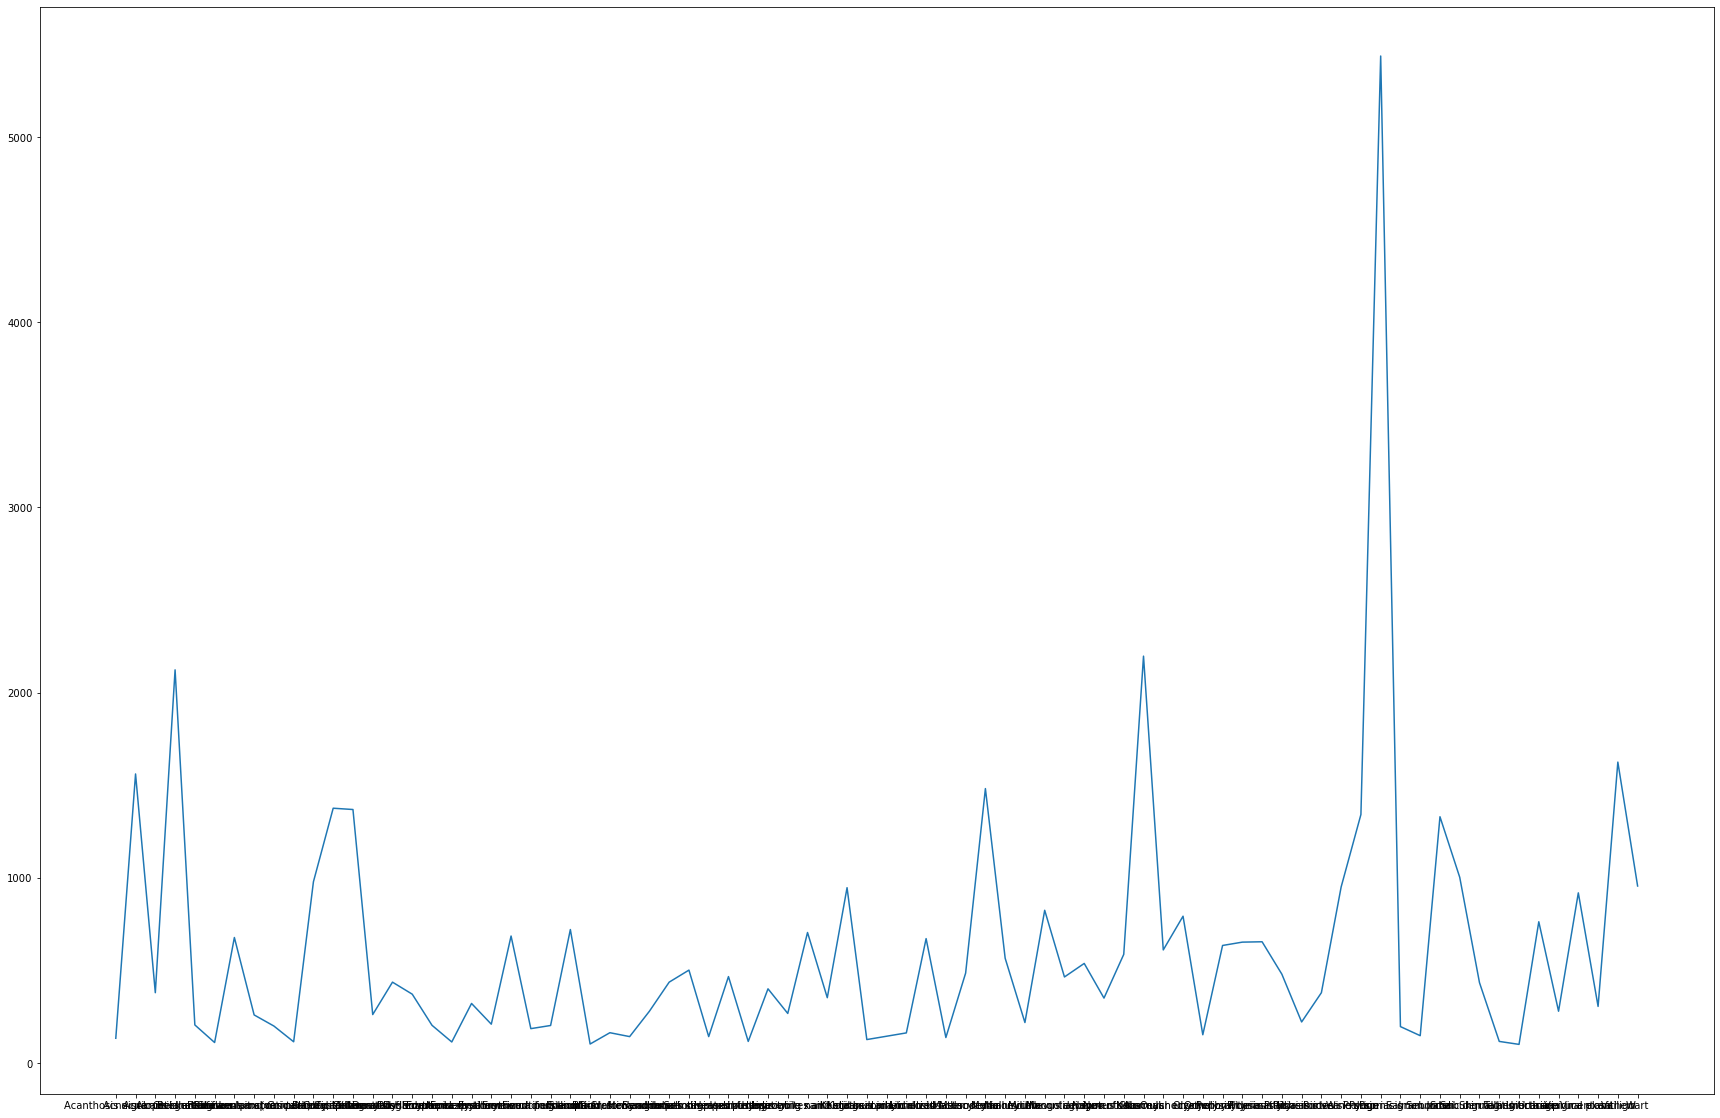

In [7]:
lists = sorted(train_dict.items())
lists

x, y = zip(*lists) 
plt.figure(figsize=(30, 20))
plt.plot(x, y)
plt.show()

In [8]:
N_CLASSES = len(train_dict)

In [9]:
train_images = [] 
test_images = []

for i in range(6):
    for key in train_dict.keys():
        img = glob(dataset + f'/H{str(i)}/{key}/*.jpg')
        train_images.extend(img) 
        
for i in range(7, 10):
    for key in train_dict.keys():
        img = glob(dataset + f'/H{str(i)}/{key}/*.jpg')
        test_images.extend(img) 
        
        
random.shuffle(train_images)
random.shuffle(test_images)
        
len(train_images), len(test_images)
        

(52516, 37369)

In [10]:
label_to_index = {}
for idx, key in zip(range(len(train_dict)), train_dict.keys()):
    label_to_index[key] = idx
    
label_to_index

{'Acne': 0,
 'Acne scar integrated': 1,
 'Alopecia areata': 2,
 'Cafe-au-lait spot': 3,
 'Corn, Callus': 4,
 'Cyst integrated': 5,
 'Dermal Melanocytic Hamartoma': 6,
 'Epidermal nevus': 7,
 'Erythema dyschromicum perstans': 8,
 'Erythema multiforme': 9,
 'Erythema nodosum': 10,
 'Granuloma annulare': 11,
 'Hemangioma integrated': 12,
 'Ichthyosis': 13,
 'Impetigo': 14,
 'Ingrowing nail': 15,
 'Juvenile xanthogranuloma': 16,
 'Keloid scar': 17,
 'Lichen striatus': 18,
 'Localized scleroderma': 19,
 'Mastocytoma': 20,
 'Melanocytic nevus': 21,
 'Melanonychia': 22,
 'Molluscum contagiosum': 23,
 'Mongolian spot': 24,
 'Nevus depigmentosus': 25,
 'Nevus of Ota': 26,
 'Nevus sebaceus': 27,
 'Normal': 28,
 'Nummular eczema': 29,
 'Onychodystrophy': 30,
 'Onycholysis': 31,
 'Perioral dermatitis': 32,
 'Pityriasis alba': 33,
 'Pityriasis lichenoides': 34,
 'Pityriasis versicolor': 35,
 'Port-Wine stain': 36,
 'Prurigo': 37,
 'Psoriasis': 38,
 'Scar': 39,
 'Seborrheic dermatitis': 40,
 'Subung